Exercise
At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv. This file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

1) Predict price of a mercedez benz that is 4 yr old with mileage 45000

2) Predict price of a BMW X5 that is 7 yr old with mileage 86000

3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv("C:\\Users\\User\\OneDrive\\Documents\\Faiz Khan Program\\Machine Learning\\ML with codebasics\\carprices.csv")

In [3]:
data

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


### scatter plot chart to see if linear regression model can be applied

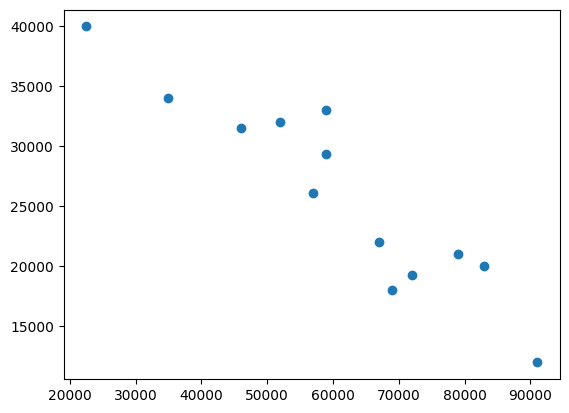

In [91]:
plt.scatter(data['Mileage'], data['Sell Price($)'])

## One Hot Encoding

In [5]:
encoder = OneHotEncoder(sparse=False)
encoded_Data = encoder.fit_transform(data[['Car Model']])
encoded_Data

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [21]:
encoded_df = pd.DataFrame(encoded_Data, 
                          columns=encoder.get_feature_names_out(['Car Model'])).astype(int)
encoded_df

,Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [27]:
data = pd.concat([data, encoded_df], axis=1)
data

,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [28]:
data.drop(['Car Model_Mercedez Benz C class'], axis=1, inplace=True)
data

,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


### Model Training

In [35]:
model = LinearRegression()
X = data.drop(['Sell Price($)'], axis=1)
y = data['Sell Price($)']
model.fit(X, y)

LinearRegression()

Predict price of a mercedez benz that is 4 yr old with mileage 45000

In [40]:
model.predict([[45000, 4, 0, 0]])

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

Predict price of a BMW X5 that is 7 yr old with mileage 86000

In [42]:
model.predict([[86000, 7, 0, 1]])

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

#### Manually predicting price of a BMW X5 that is 7 yr old with mileage 86000 using formula to assure

In [70]:
# m1 * x1 + m2 * x2 + m3 * x3 + m4 * x4 + b
model.coef_[0] * 86000 + model.coef_[1] * 7 + model.coef_[2] * 0 + model.coef_[3] * 1 + model.intercept_

11080.74313219064

#### Plotting best fit line using Mileage and Sell Price($) columns

**Best fit line:**

To draw best fit line we plot **plt.plot(X, predicted_values)**
X column which in this case we are using Mileage.

Here, since we cant use the predicted value above since it contains multi variable and we only want to use one variable which is Mileage so we get the Predicted value manually

**Formula:**
m * x + b

**model.coef_[0] * data[['Mileage']]** is m * x

We dont want to find m for Mileage by manually calculating it so we use model.coef_[0] since
it gives 4 coefficient cuz there's 4 variables (Mileage, Age, Car Model_Audi A5, Car Model_BMW X5) 
and Mileage is the firt variable so model.coef_[0]

We cant use model.intercept_ since its multi variable, hence we manually calculated the intercept for Mileage

**b formula:**

b = mean of y - (m * mean of x)

so,

b = np.mean(data['Sell Price($)']) - (model.coef_[0] * np.mean(data['Mileage'])))

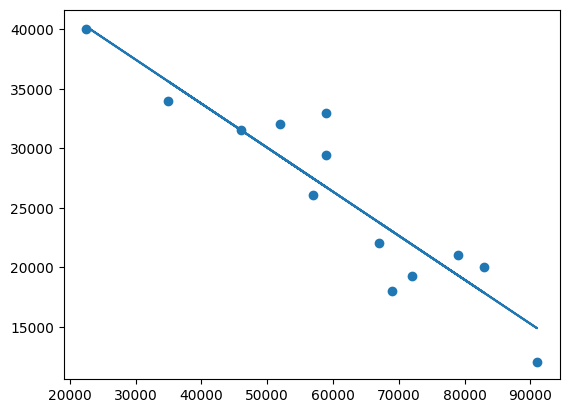

In [89]:

plt.scatter(data['Mileage'], data['Sell Price($)'])
plt.plot(data['Mileage'], model.coef_[0] * data[['Mileage']] + 
         np.mean(data['Sell Price($)']) - (model.coef_[0] * np.mean(data['Mileage'])))

### Score

In [92]:
model.score(X, y)

0.9417050937281082

### Getting Mean Squared Error manually 

In [110]:
compare = y - model.predict(data[['Mileage', 'Age(yrs)','Car Model_Audi A5','Car Model_BMW X5']])
sum_squared = sum(np.square(compare))
sum_squared/len(data)

3447036.4477035073

### Getting MSE using SKLearn

In [113]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, model.predict(data[['Mileage', 'Age(yrs)','Car Model_Audi A5','Car Model_BMW X5']]))

### Getting Root Mean Squared Error (RMSE)

The Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are both metrics used to evaluate the performance of regression models, but they have distinct characteristics and interpretations.

 - MSE is the average of the squares of the errors. The error is the difference between the actual value and the predicted value.
 Units: The units of MSE are the square of the units of the target variable. For example, if the target variable is in dollars, the MSE will be in dollars squared.
 
 - RMSE is the square root of the average of the squares of the errors. It is simply the square root of MSE.
 The units of RMSE are the same as the units of the target variable. This makes RMSE more interpretable compared to MSE, as it can be directly compared to the actual values.
 
 **Key Differences**
 
 - **MSE**: Because MSE squares the error terms, it can exaggerate the impact of larger errors and is not in the same units as the original data, which can make it harder to interpret.
 The MSE metric is in the squared units of the target variable. If your target variable is house prices in dollars, MSE would be in dollars squared, which is not a unit that has an intuitive meaning in the real world.
 
- **RMSE**: By taking the square root of MSE, RMSE brings the metric back to the same unit as the target variable, making it easier to interpret and compare with the actual values.
The RMSE metric is in the same units as the target variable. This makes it much easier to interpret. For example, if you are predicting house prices, and your RMSE is $20,000, you know your predictions are off by about $20,000 on average.

RMSE is the square root of MSE


In [114]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 1856.6196292465258
